## Bike Sharing Dataset

## Problem Statement

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


## About the DataSet :

day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

|Features|Description|
|-----|-----|
|instant| record index|
|season  | season (1:springer, 2:summer, 3:fall, 4:winter)|
|yr | year (0: 2011, 1:2012)|
|mnth | month ( 1 to 12)|
|holiday | weather day is holiday or not(extracted from http://dchr.dc.gov/page/holiday-schedule)|
|weekday | day of the week|
|workingday | if day is neither weekend nor holiday is 1, otherwise is 0.|
|weathersit |1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mi<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
|temp | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)|
|atemp | Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)|
|hum | Normalized humidity. The values are divided to 100 (max)|
|windspeed | Normalized wind speed. The values are divided to 67 (max)|
|cnt | count of total rental bikes including both casual and registered|
 

### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

### Load the data

In [3]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


### Plot the distribution of target variable

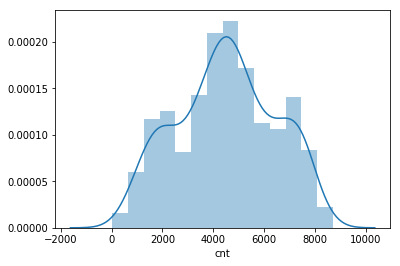

In [4]:
#histogram
sns.distplot(bike_sharing['cnt'])

### Check the skewness of numerical columns by plotting histograms.

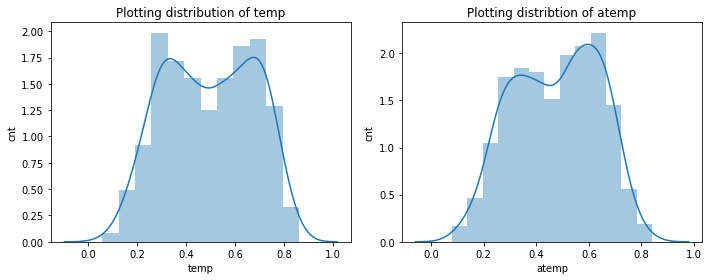

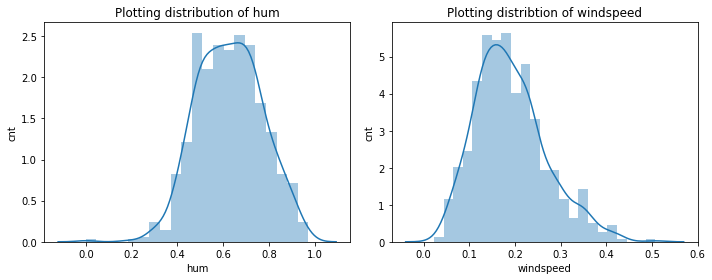

In [11]:
numerical = ['temp','atemp','hum','windspeed']
for i in range(0,len(numerical),2):
    if len(numerical) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(bike_sharing[numerical[i]])
        plt.title('Plotting distribution of '+numerical[i])
        plt.xlabel(numerical[i])
        plt.ylabel("cnt")
        plt.subplot(122)
        sns.distplot(bike_sharing[numerical[i+1]])
        plt.title('Plotting distribtion of '+numerical[i+1])
        plt.xlabel(numerical[i+1])
        plt.ylabel("cnt")
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(bike_sharing[numerical[i]],bike_sharing["cnt"])

### Plot bivariate distribution of target against all  the continous features i.e("temp",	"atemp",	"hum",	"windspeed").

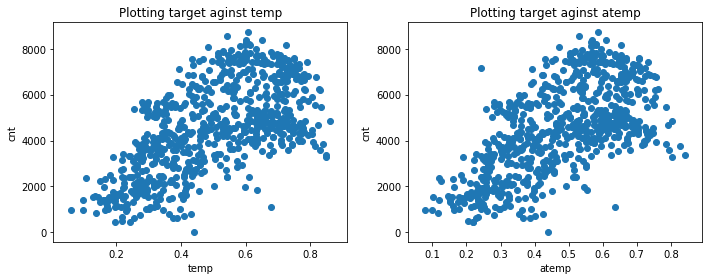

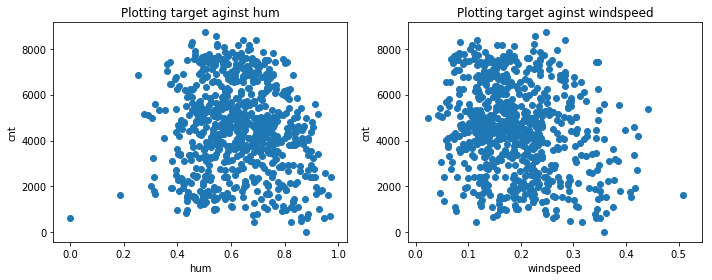

In [7]:
numerical = ['temp','atemp','hum','windspeed']
for i in range(0,len(numerical),2):
    if len(numerical) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        plt.scatter(bike_sharing[numerical[i]],bike_sharing["cnt"])
        plt.title('Plotting target aginst '+numerical[i])
        plt.xlabel(numerical[i])
        plt.ylabel("cnt")
        plt.subplot(122)
        plt.scatter(bike_sharing[numerical[i+1]],bike_sharing["cnt"])
        plt.title('Plotting target aginst '+numerical[i+1])
        plt.xlabel(numerical[i+1])
        plt.ylabel("cnt")
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(bike_sharing[numerical[i]],bike_sharing["cnt"])

### Plot bivariate distribution of target against all the categorical features i.e("season", "mnth", "holiday", "weekday", "workingday","weathersit").

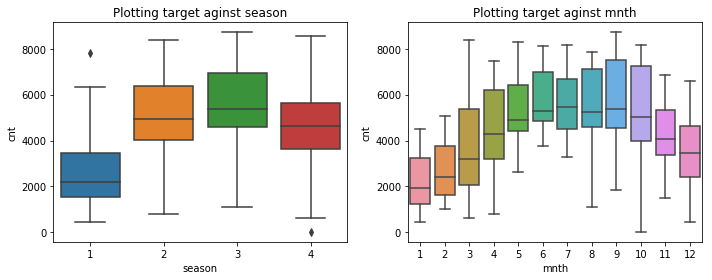

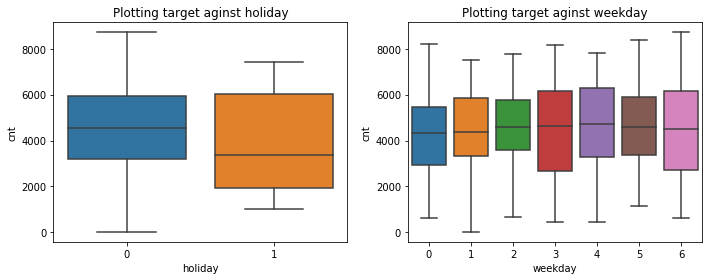

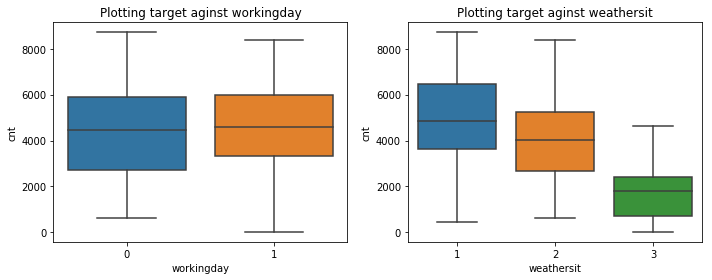

In [8]:
categorical = ["season","mnth","holiday","weekday","workingday","weathersit"]
for i in range(0,len(categorical),2):
    if len(categorical) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(bike_sharing[categorical[i]],bike_sharing["cnt"])
        plt.title('Plotting target aginst '+categorical[i])
        plt.xlabel(categorical[i])
        plt.ylabel("cnt")
        plt.subplot(122)
        sns.boxplot(bike_sharing[categorical[i+1]],bike_sharing["cnt"])
        plt.title('Plotting target aginst '+categorical[i+1])
        plt.xlabel(categorical[i+1])
        plt.ylabel("cnt")
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(bike_sharing[categorical[i]],bike_sharing["cnt"])

### Drop the columns i.e("instant","dteday") and then split the Features into predictor and target.

In [9]:
X = bike_sharing.drop(["instant","cnt"],1)
y = bike_sharing["cnt"].copy()

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size =0.2 , random_state = 42)


### Create a baseline regression model and observe the error measured and calculate the R2 Score.

In [13]:
lr  = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val,y_pred))

print("Root Mean Squared Error: ", rmse)
print("R2_score: ",r2_score(y_val,y_pred))

Root Mean Squared Error:  831.2851545662686
R2_score:  0.8276670090367212
